<h1><center>Regresión Logistica - Breast Cancer</center></h1>

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
datos = pd.read_csv('breast_cancer.csv')

## Datos de entrenamiento y prueba

In [119]:
y = datos['clase']

In [120]:
X = datos.drop('clase',axis=1)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Entrenamiento del modelo

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
lm = LogisticRegression()

In [125]:
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predicción con los datos de prueba

In [126]:
predictions = lm.predict(X_test)

In [127]:
predictions

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

## Evaluación del modelo

In [128]:
from sklearn.metrics import confusion_matrix

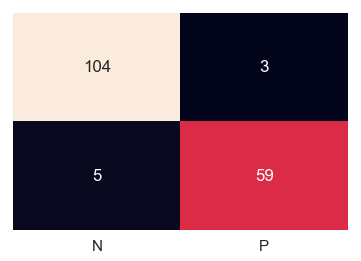

In [144]:
arregloMC = confusion_matrix(y_test,predictions)
sns.set(font_scale=1.4)
sns.heatmap(arregloMC, annot=True, fmt='g', cbar=False, xticklabels=['N','P'], yticklabels=['',''])

In [142]:
from sklearn.metrics import classification_report

In [143]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Eliminando nucleos desnudos

In [145]:
y2 = datos['clase']

In [146]:
X2 = datos.drop(['nucleos_desnudos', 'clase'],axis=1)

In [147]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [148]:
lm2 = LogisticRegression()

In [149]:
lm2.fit(X2_train,y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
predictions2 = lm2.predict(X2_test)

In [152]:
predictions2

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

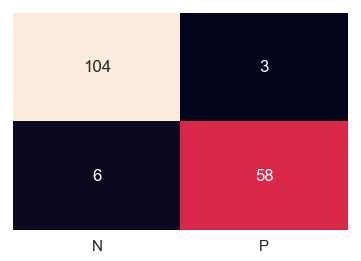

In [153]:
arregloMC2 = confusion_matrix(y2_test,predictions2)
sns.set(font_scale=1.4)
sns.heatmap(arregloMC2, annot=True, fmt='g', cbar=False, xticklabels=['N','P'], yticklabels=['',''])

## Evaluación del modelo

Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

** Calcule el error absoluto promedio, el error cuadrado promedio y la raíz del error cuadrático promedio.**

In [154]:
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Vemos que vario en un 0.01 al no tomar la categoria nucleos desnudos